In [1]:
import numpy as np 
import pandas as pd 

### Loading the Dataset
Here, the training and test datasets are loaded using `pd.read_csv()`. This function reads CSV files into DataFrames.
- `train.csv` contains the training data.
- `test.csv` contains the test data.

Displaying the first few rows of `train` using `.head()` helps verify the data’s structure and content.

In [2]:
train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


### Checking for Missing Values
This code cell checks for missing values in each column of the `train` dataset using `.isnull().sum()`.
- Missing values can affect model performance and may require imputation or handling.

In [3]:
train.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

### Statistical Summary of Numerical Columns
The `.describe()` method provides a statistical summary of all numerical columns in the training dataset, including:
- Count, mean, standard deviation, minimum, and maximum values.
- Percentiles (25%, 50%, 75%) which provide insights into the data distribution.

In [4]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


### Handling Missing Values in Categorical Columns
Categorical columns with missing values are filled with the placeholder `"unknown"` to retain information and avoid data loss.
- Columns with missing values include `job`, `education`, `contact`, and `poutcome`.
- This approach ensures categorical columns remain consistent without null entries, which can simplify further analysis and modeling.

In [5]:
train['job']= train['job'].fillna("unknown")
train['education'] = train['education'].fillna("unknown")
train['contact'] = train['contact'].fillna("unknown")
train['poutcome'] = train['poutcome'].fillna("unknown")

test['job']= test['job'].fillna("unknown")
test['education'] = test['education'].fillna("unknown")
test['contact'] = test['contact'].fillna("unknown")
test['poutcome'] = test['poutcome'].fillna("unknown")

### Encoding Target Variable
The target variable in the training dataset is encoded to binary values:
- `yes` is mapped to `1` (success) and `no` to `0` (failure).
- This encoding is necessary to convert categorical labels into a format suitable for machine learning algorithms.

In [6]:
train['target'] = train['target'].map({'yes': 1, 'no': 0})

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

<Axes: xlabel='target', ylabel='age'>

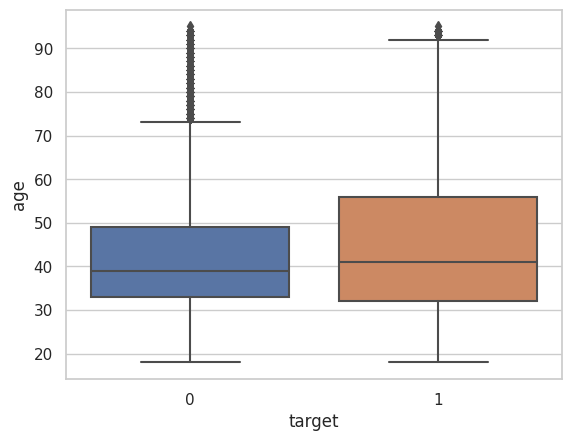

In [8]:
sns.boxplot(x='target', y='age', data=train)

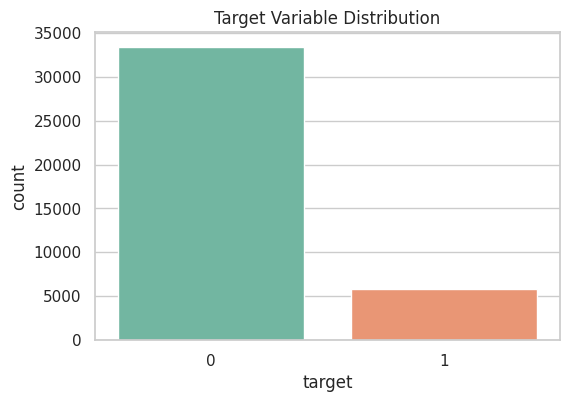

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train, palette='Set2')
plt.title('Target Variable Distribution')
plt.show()

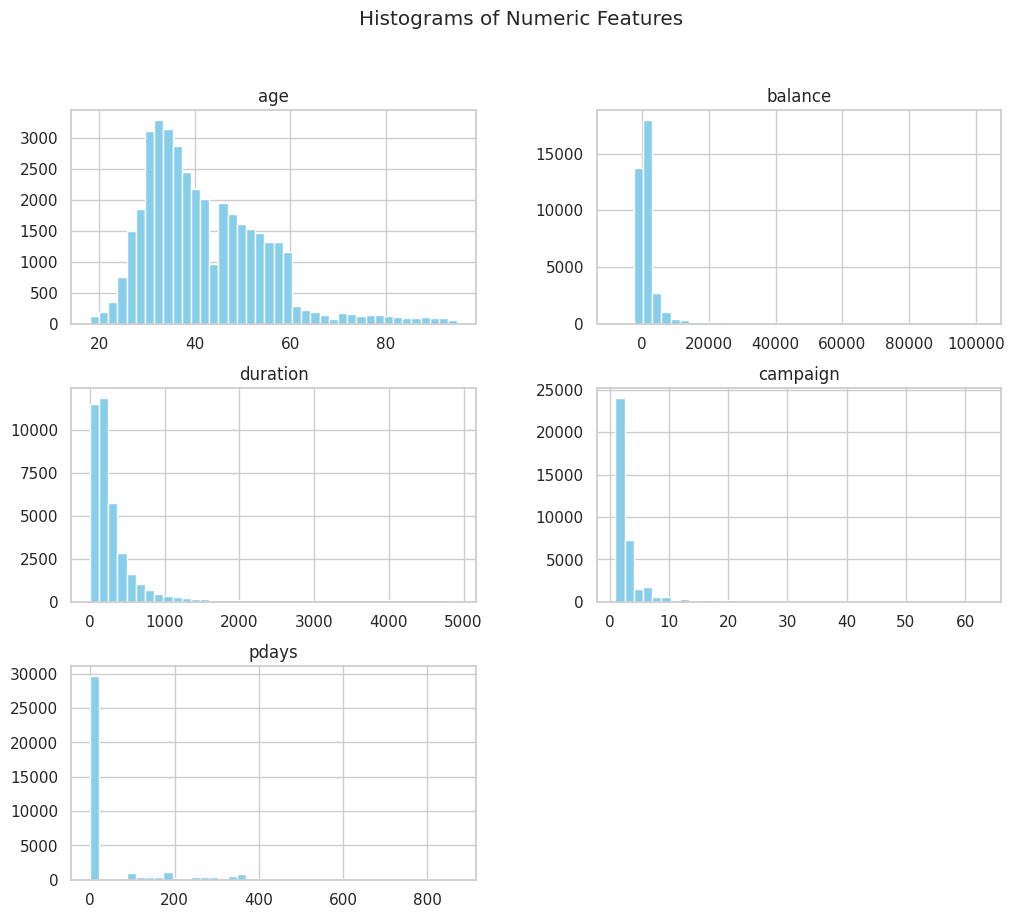

In [10]:
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays']
train[numeric_cols].hist(bins=40, figsize=(12, 10), layout=(3, 2), color='skyblue')
plt.suptitle('Histograms of Numeric Features')
plt.show()

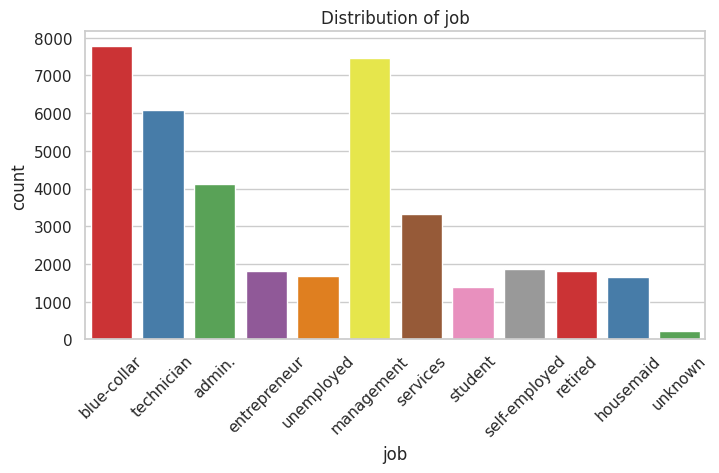

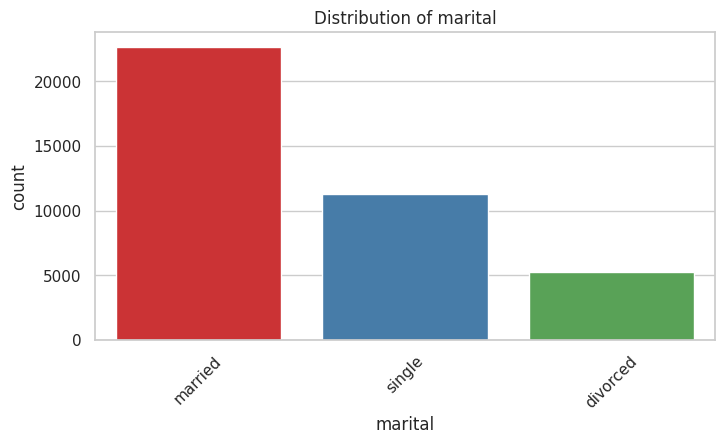

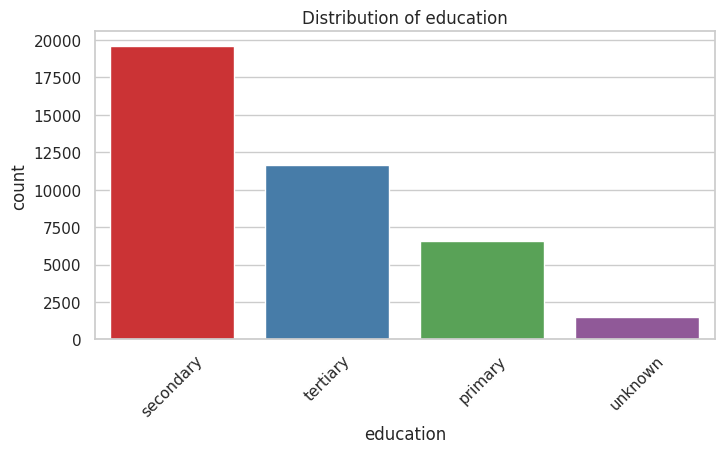

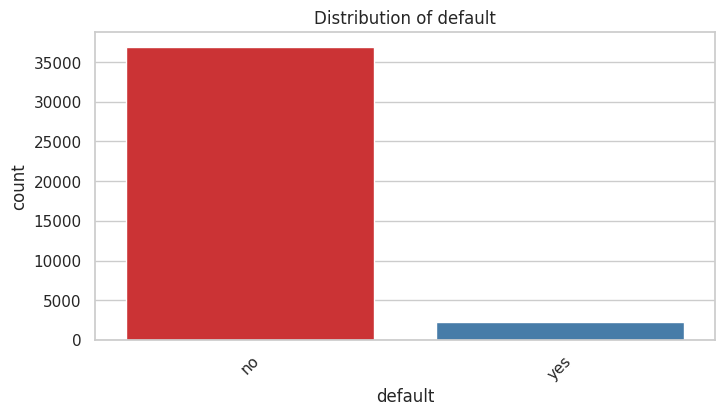

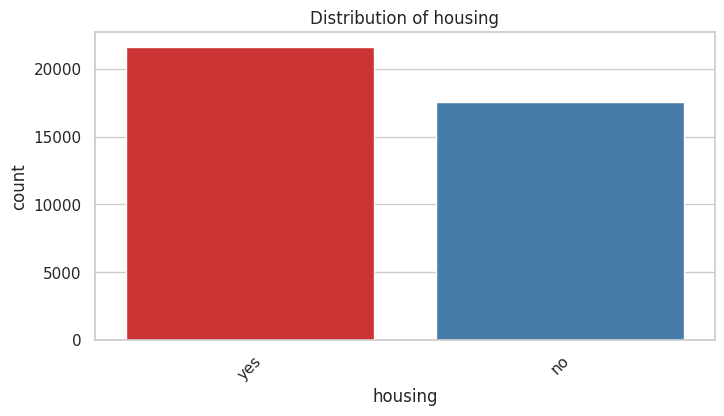

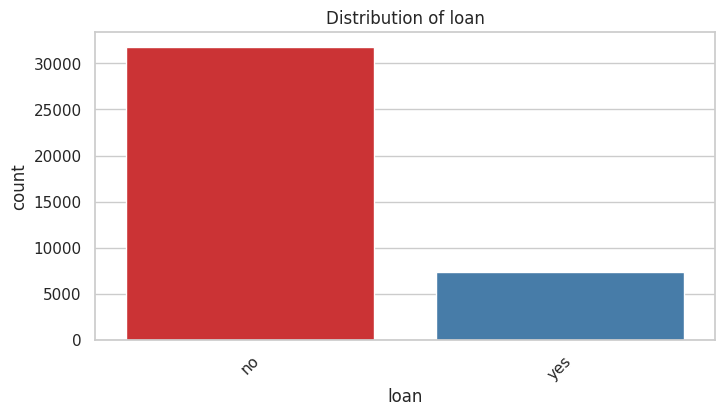

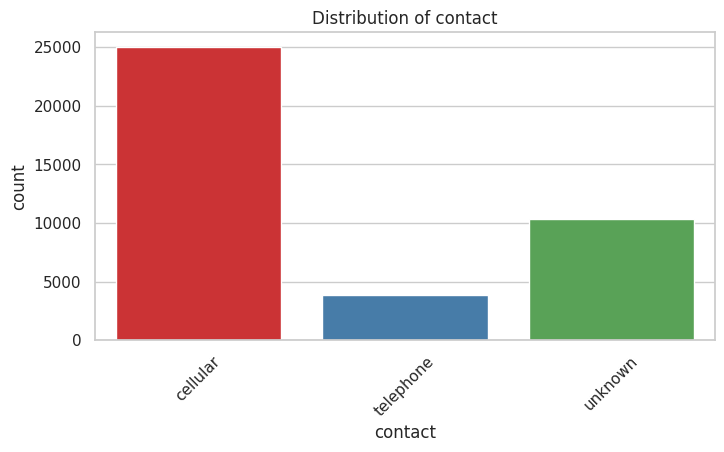

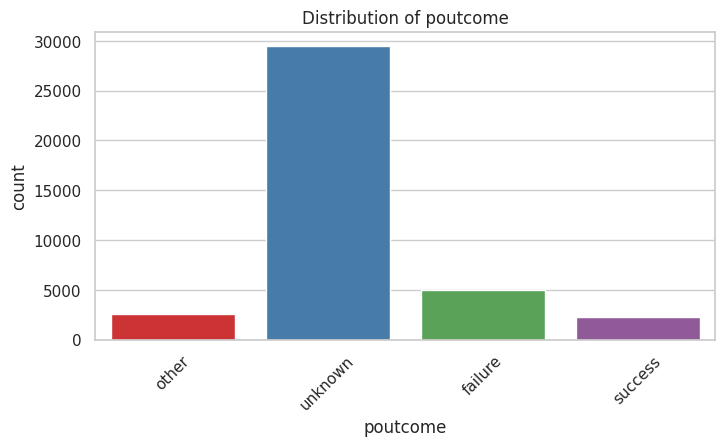

In [11]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train, palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

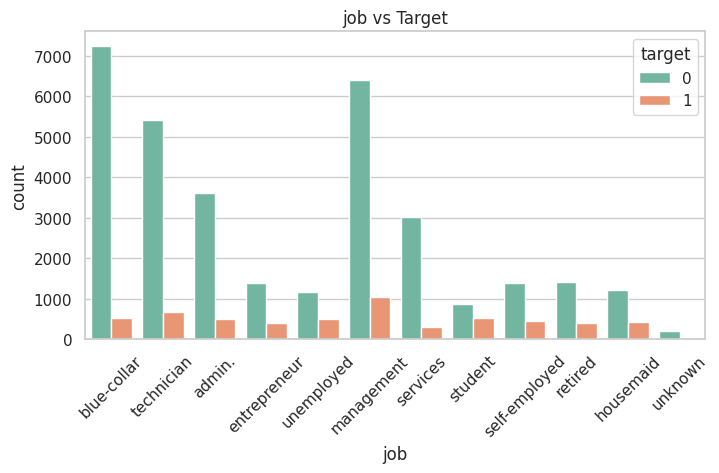

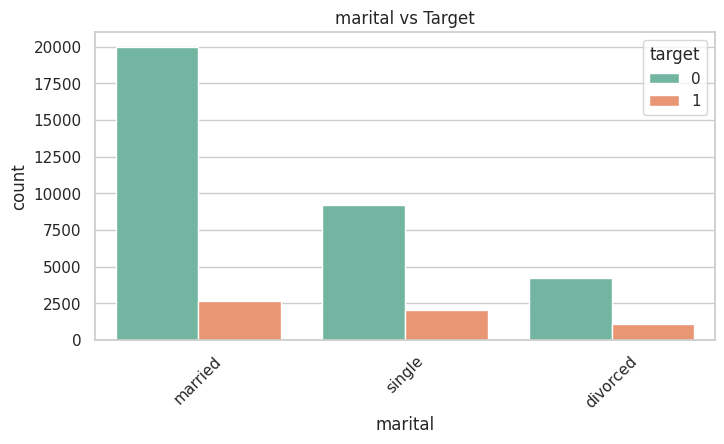

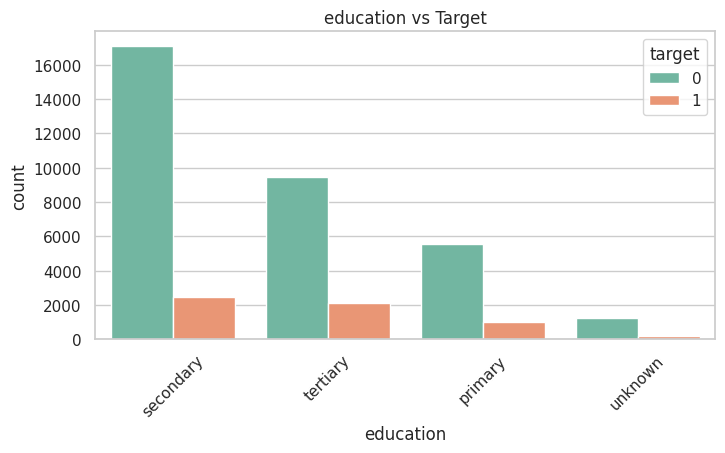

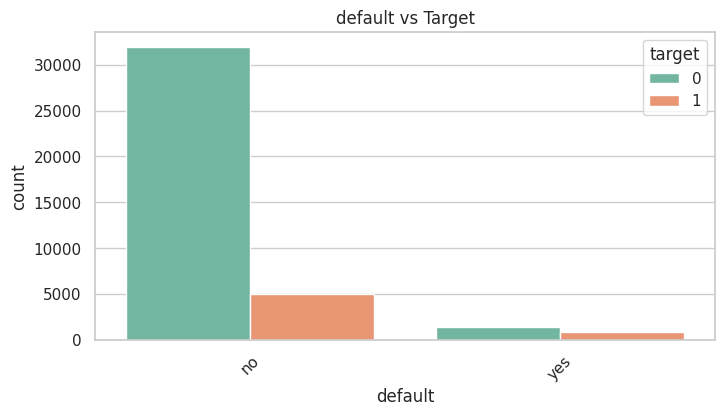

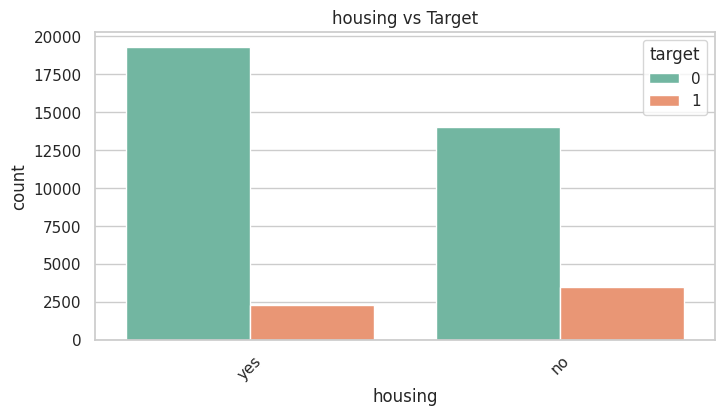

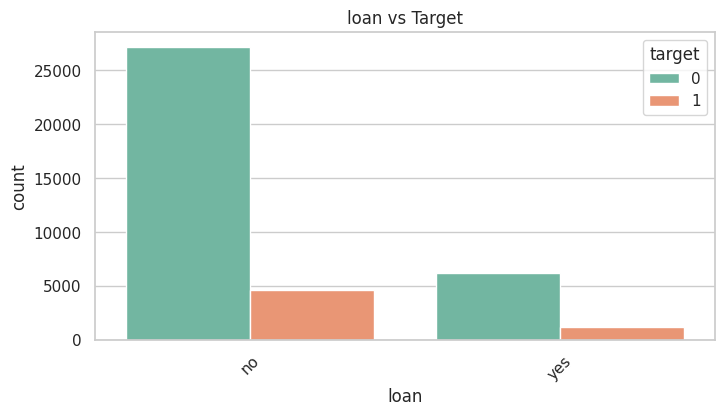

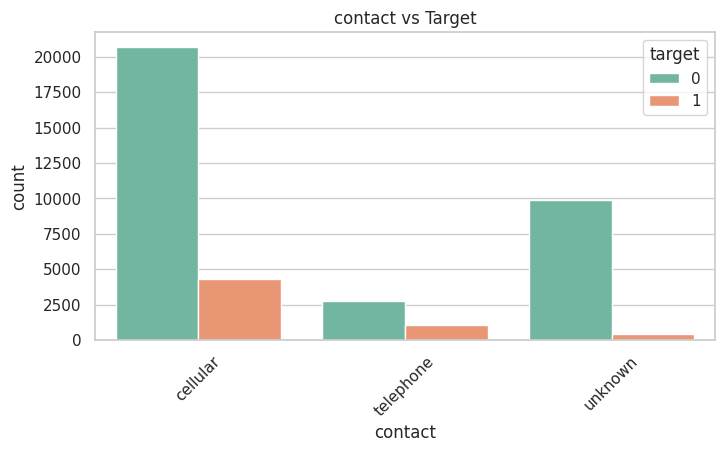

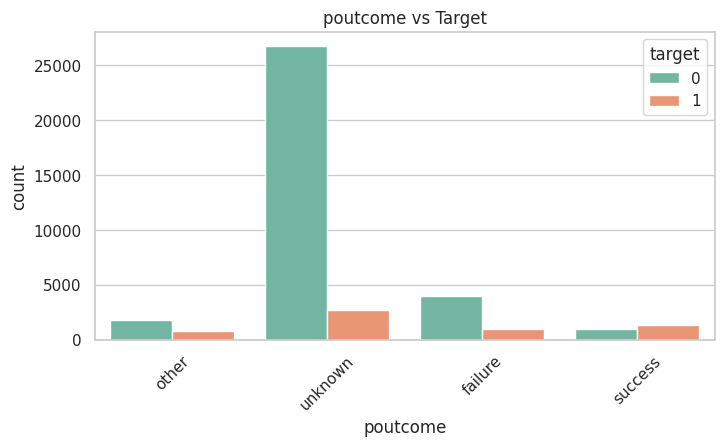

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='target', data=train, palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.show()

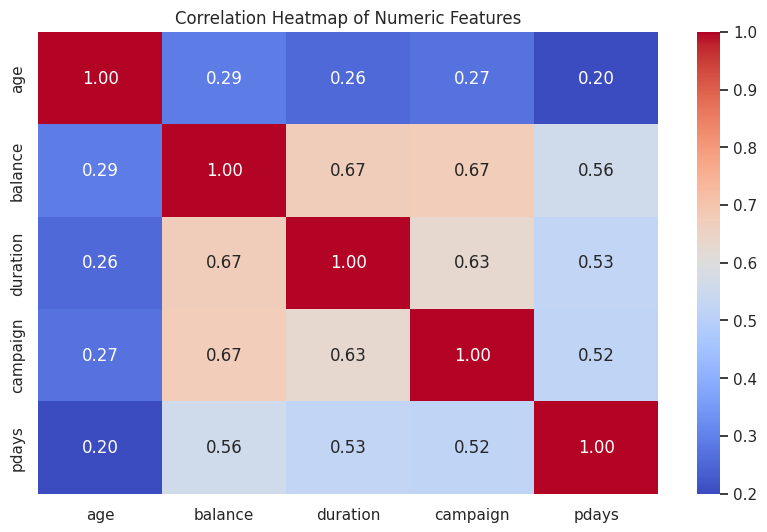

In [13]:
plt.figure(figsize=(10, 6))
corr_matrix = train[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [14]:
X = train.drop('target', axis=1)
y = train['target']
X.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,unknown
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,unknown
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,unknown
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,unknown


In [15]:
X['default'] = X['default'].map({'yes': 1, 'no': 0})
X['housing'] = X['housing'].map({'yes': 1, 'no': 0})
X['loan'] = X['loan'].map({'yes': 1, 'no': 0})

test['default'] = test['default'].map({'yes': 1, 'no': 0})
test['housing'] = test['housing'].map({'yes': 1, 'no': 0})
test['loan'] = test['loan'].map({'yes': 1, 'no': 0})
X.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-04-17,26,blue-collar,married,secondary,0,647,1,0,cellular,357,2,331,1,other
1,2009-10-11,52,technician,married,secondary,0,553,1,0,telephone,160,1,-1,0,unknown
2,2010-11-20,44,blue-collar,married,secondary,0,1397,0,0,cellular,326,1,-1,0,unknown
3,2009-09-01,33,admin.,married,secondary,0,394,1,0,telephone,104,3,-1,0,unknown
4,2008-01-29,31,entrepreneur,single,tertiary,0,137,0,0,cellular,445,2,-1,0,unknown


### Extracting Date-Based Features
The `last contact date` column is converted to datetime format, and new features are created based on this date:
- **`day_of_week`**: Extracts the day of the week (0 for Monday, 6 for Sunday) to capture patterns in contacts across the week.
- **`month`**: Extracts the month to capture potential seasonal trends.
- **`is_month_end`**: Indicates if the contact happened in the last week of the month, where customer responses might differ.
- **`is_month_start`**: Indicates if the contact occurred within the first week of the month.

In [16]:
X['last contact date'] = pd.to_datetime(X['last contact date'])
X['day_of_week'] = X['last contact date'].dt.dayofweek
X['month'] = X['last contact date'].dt.month
X['is_month_end'] = X['last contact date'].dt.day >= 25
X['is_month_start'] = X['last contact date'].dt.day <= 5

test['last contact date'] = pd.to_datetime(test['last contact date'])
test['day_of_week'] = test['last contact date'].dt.dayofweek
test['month'] = test['last contact date'].dt.month
test['is_month_end'] = test['last contact date'].dt.day >= 25
test['is_month_start'] = test['last contact date'].dt.day <= 5

X.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_week,month,is_month_end,is_month_start
0,2009-04-17,26,blue-collar,married,secondary,0,647,1,0,cellular,357,2,331,1,other,4,4,False,False
1,2009-10-11,52,technician,married,secondary,0,553,1,0,telephone,160,1,-1,0,unknown,6,10,False,False
2,2010-11-20,44,blue-collar,married,secondary,0,1397,0,0,cellular,326,1,-1,0,unknown,5,11,False,False
3,2009-09-01,33,admin.,married,secondary,0,394,1,0,telephone,104,3,-1,0,unknown,1,9,False,True
4,2008-01-29,31,entrepreneur,single,tertiary,0,137,0,0,cellular,445,2,-1,0,unknown,1,1,True,False


### Encoding Education Levels
The `education` column is encoded with integer values based on education levels:
- **`education_encoded`**: Maps 'unknown' to 0, 'primary' to 1, 'secondary' to 2, and 'tertiary' to 3, providing a numerical representation of education levels.
- This ordinal encoding helps the model interpret the progression in education levels effectively.

In [17]:
education_map = {
        'unknown': 0,
        'primary': 1,
        'secondary': 2,
        'tertiary': 3
    }
X['education_encoded'] = X['education'].map(education_map)
test['education_encoded'] = test['education'].map(education_map)
X.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_week,month,is_month_end,is_month_start,education_encoded
0,2009-04-17,26,blue-collar,married,secondary,0,647,1,0,cellular,357,2,331,1,other,4,4,False,False,2
1,2009-10-11,52,technician,married,secondary,0,553,1,0,telephone,160,1,-1,0,unknown,6,10,False,False,2
2,2010-11-20,44,blue-collar,married,secondary,0,1397,0,0,cellular,326,1,-1,0,unknown,5,11,False,False,2
3,2009-09-01,33,admin.,married,secondary,0,394,1,0,telephone,104,3,-1,0,unknown,1,9,False,True,2
4,2008-01-29,31,entrepreneur,single,tertiary,0,137,0,0,cellular,445,2,-1,0,unknown,1,1,True,False,3


### Calculating Previous Success Rate
A new feature, **`previous_success_rate`**, calculates the success rate of previous campaigns:
- If a client has been previously contacted (`previous > 0`), this rate is the number of successful contacts divided by total previous contacts.
- Otherwise, the rate is set to 0. This feature helps the model understand a client's responsiveness based on past interactions.

In [18]:
X['previous_success_rate'] = np.where(X['previous'] > 0, (X['poutcome'] == 'success').astype(int) / X['previous'], 0)
test['previous_success_rate'] = np.where(test['previous'] > 0, (test['poutcome'] == 'success').astype(int) / test['previous'], 0)
X.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,day_of_week,month,is_month_end,is_month_start,education_encoded,previous_success_rate
0,2009-04-17,26,blue-collar,married,secondary,0,647,1,0,cellular,...,2,331,1,other,4,4,False,False,2,0.0
1,2009-10-11,52,technician,married,secondary,0,553,1,0,telephone,...,1,-1,0,unknown,6,10,False,False,2,0.0
2,2010-11-20,44,blue-collar,married,secondary,0,1397,0,0,cellular,...,1,-1,0,unknown,5,11,False,False,2,0.0
3,2009-09-01,33,admin.,married,secondary,0,394,1,0,telephone,...,3,-1,0,unknown,1,9,False,True,2,0.0
4,2008-01-29,31,entrepreneur,single,tertiary,0,137,0,0,cellular,...,2,-1,0,unknown,1,1,True,False,3,0.0


### Encoding Categorical Features with One-Hot Encoding
Here, categorical variables are converted into numerical format using one-hot encoding:
- `pd.get_dummies()` creates new columns representing each category as binary values (1 or 0).
- This allows categorical data to be used in machine learning models, which typically require numerical input.

In [19]:
nominal_cols = ['job', 'marital', 'contact', 'poutcome']
X = pd.get_dummies(X, columns=nominal_cols, prefix=nominal_cols)
test = pd.get_dummies(test, columns=nominal_cols, prefix=nominal_cols)
X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,False,True,False,True,False,False,False,True,False,False
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,False,True,False,False,True,False,False,False,False,True
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,False,True,False,True,False,False,False,False,False,True
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,False,True,False,False,True,False,False,False,False,True
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,False,False,True,True,False,False,False,False,False,True


### Grouping Age into Categories
Age is divided into meaningful categories to simplify the model's interpretation:
- **`age_group`**: Categorizes ages into `<25`, `25-35`, `35-50`, and `50+`.
- This binning helps the model identify trends in customer behavior based on life stages.

In [20]:
X['age_group'] = pd.cut(X['age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])
test['age_group'] = pd.cut(test['age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])
X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,True,False,True,False,False,False,True,False,False,25-35
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,True,False,False,True,False,False,False,False,True,50+
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,True,False,True,False,False,False,False,False,True,35-50
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,True,False,False,True,False,False,False,False,True,25-35
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,False,True,True,False,False,False,False,False,True,25-35


### Categorizing Balance and Identifying Negative Balances
Two new features based on balance are created:
- **`balance_group`**: Divides balance into quintiles labeled 'VL' (Very Low), 'L' (Low), 'M' (Medium), 'H' (High), and 'VH' (Very High) using `qcut`.
- **`has_negative_balance`**: Indicates whether the balance is negative (True) or not.
- These features provide insights into financial status and potential risk levels.

In [21]:
X['balance_group'] = pd.qcut(X['balance'], q=5, labels=['VL', 'L', 'M', 'H', 'VH'])
X['has_negative_balance'] = X['balance'] < 0

test['balance_group'] = pd.qcut(test['balance'], q=5, labels=['VL', 'L', 'M', 'H', 'VH'])
test['has_negative_balance'] = test['balance'] < 0
X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group,balance_group,has_negative_balance
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,True,False,False,False,True,False,False,25-35,M,False
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,False,True,False,False,False,False,True,50+,M,False
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,True,False,False,False,False,False,True,35-50,H,False
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,False,True,False,False,False,False,True,25-35,M,False
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,True,False,False,False,False,False,True,25-35,L,False


### Calculating Campaign Intensity
**`campaign_intensity`** measures the intensity of campaigns:
- Calculated as the number of contacts (`campaign`) divided by the days since the most recent contact.
- This feature helps capture how frequently a client is contacted within a recent timeframe, which may influence responsiveness.

In [22]:
days_diff = (X['last contact date'].max() - X['last contact date']).dt.days
days_diff = days_diff.replace(0,1)
X['campaign_intensity'] = X['campaign'] / days_diff

days_diff = (test['last contact date'].max() - test['last contact date']).dt.days
days_diff = days_diff.replace(0,1)
test['campaign_intensity'] = test['campaign'] / days_diff
X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group,balance_group,has_negative_balance,campaign_intensity
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,False,False,False,True,False,False,25-35,M,False,0.003215
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,True,False,False,False,False,True,50+,M,False,0.002247
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,False,False,False,False,False,True,35-50,H,False,0.025000
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,True,False,False,False,False,True,25-35,M,False,0.006186
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,False,False,False,False,False,True,25-35,L,False,0.001876


### Converting Duration to Minutes and Categorizing Duration
The `duration` column is transformed to provide two new features:
- **`duration_minutes`**: Converts `duration` from seconds to minutes for interpretability.
- **`duration_group`**: Categorizes `duration` into quartiles labeled 'Short', 'Medium', 'Long', and 'Very Long' to simplify analysis of call duration patterns.

In [23]:
X['duration_minutes'] = X['duration'] / 60
X['duration_group'] = pd.qcut(X['duration'], q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

test['duration_minutes'] = test['duration'] / 60
test['duration_group'] = pd.qcut(test['duration'], q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])
X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group,balance_group,has_negative_balance,campaign_intensity,duration_minutes,duration_group
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,False,True,False,False,25-35,M,False,0.003215,5.950000,Long
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,False,False,False,True,50+,M,False,0.002247,2.666667,Medium
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,False,False,False,True,35-50,H,False,0.025000,5.433333,Long
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,False,False,False,True,25-35,M,False,0.006186,1.733333,Short
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,False,False,False,True,25-35,L,False,0.001876,7.416667,Very Long


### Creating Loan-Related Features
Two new features are added to capture information about loans and financial risk:
- **`total_loans`**: Sum of `housing` and `loan` indicators, representing whether the client has any type of loan.
- **`financial_risk`**: Combines the `default` status with `total_loans` to assess potential financial risk, where having loans and being in default increases the risk score.

In [24]:
X['total_loans'] = X['housing'] + X['loan']
X['financial_risk'] = X['default'] * (X['total_loans'] + 1)
test['total_loans'] = test['housing'] + test['loan']
test['financial_risk'] = test['default'] * (test['total_loans'] + 1)
X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,poutcome_success,poutcome_unknown,age_group,balance_group,has_negative_balance,campaign_intensity,duration_minutes,duration_group,total_loans,financial_risk
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,False,False,25-35,M,False,0.003215,5.950000,Long,1,0
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,False,True,50+,M,False,0.002247,2.666667,Medium,1,0
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,False,True,35-50,H,False,0.025000,5.433333,Long,0,0
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,False,True,25-35,M,False,0.006186,1.733333,Short,1,0
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,False,True,25-35,L,False,0.001876,7.416667,Very Long,0,0


### Combining Month and Day of Week for Contact Timing
**`contact_timing`** combines `month` and `day_of_week` into a single string (e.g., "5_2" for the 5th month and Tuesday):
- This feature captures both the month and day simultaneously, allowing the model to detect specific timing patterns that could influence contact success rates.

In [25]:
X['contact_timing'] = X['month'].astype(str) + '_' + X['day_of_week'].astype(str)
test['contact_timing'] = test['month'].astype(str) + '_' + test['day_of_week'].astype(str)

X['contact_timing'] = X['contact_timing'].astype('category')
test['contact_timing'] = test['contact_timing'].astype('category')

### Creating Profile Score Feature
A new feature called `profile_score` is calculated based on three important columns:
- **Weighting**: `age_group`, `education_encoded`, and `balance_group` are weighted at 0.3, 0.3, and 0.4, respectively, to represent a customer profile score.
- **Categorical Encoding**: The `astype('category').cat.codes` method assigns numerical codes to categorical groups for `age_group` and `balance_group`.
- This score provides a summary measure of each customer's profile, based on demographic and financial factors.

In [26]:
X['profile_score'] = (X['age_group'].astype('category').cat.codes * 0.3 + X['education_encoded'] * 0.3 + X['balance_group'].astype('category').cat.codes * 0.4)
test['profile_score'] = (test['age_group'].astype('category').cat.codes * 0.3 + test['education_encoded'] * 0.3 + test['balance_group'].astype('category').cat.codes * 0.4)

X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,age_group,balance_group,has_negative_balance,campaign_intensity,duration_minutes,duration_group,total_loans,financial_risk,contact_timing,profile_score
0,2009-04-17,26,secondary,0,647,1,0,357,2,331,...,25-35,M,False,0.003215,5.950000,Long,1,0,4_4,1.7
1,2009-10-11,52,secondary,0,553,1,0,160,1,-1,...,50+,M,False,0.002247,2.666667,Medium,1,0,10_6,2.3
2,2010-11-20,44,secondary,0,1397,0,0,326,1,-1,...,35-50,H,False,0.025000,5.433333,Long,0,0,11_5,2.4
3,2009-09-01,33,secondary,0,394,1,0,104,3,-1,...,25-35,M,False,0.006186,1.733333,Short,1,0,9_1,1.7
4,2008-01-29,31,tertiary,0,137,0,0,445,2,-1,...,25-35,L,False,0.001876,7.416667,Very Long,0,0,1_1,1.6


### Normalizing Campaign and Duration for Engagement Score
Two key features, `campaign` and `duration`, are converted to float and normalized:
- **Campaign Normalization**: Divides each value by the maximum `campaign` value to create a relative measure.
- **Duration Normalization**: Divides each value by the maximum `duration` value, provided the max is not zero.
- **Engagement Score Calculation**: `campaign_norm` is weighted at 0.4 and `duration_norm` at 0.6 to calculate an `engagement_score` that reflects customer engagement in terms of frequency and duration of contact.

In [27]:
X['campaign'] = X['campaign'].astype(float)
X['duration'] = X['duration'].astype(float)

test['campaign'] = test['campaign'].astype(float)
test['duration'] = test['duration'].astype(float)

campaign_norm = X['campaign'] / X['campaign'].max() if X['campaign'].max() != 0 else X['campaign']
duration_norm = X['duration'] / X['duration'].max() if X['duration'].max() != 0 else X['duration']
    
X['engagement_score'] = (campaign_norm * 0.4 + duration_norm * 0.6)

campaign_norm = test['campaign'] / test['campaign'].max() if test['campaign'].max() != 0 else test['campaign']
duration_norm = test['duration'] / test['duration'].max() if test['duration'].max() != 0 else test['duration']
    
test['engagement_score'] = (campaign_norm * 0.4 + duration_norm * 0.6)

X.head()

,last contact date,age,education,default,balance,housing,loan,duration,campaign,pdays,...,balance_group,has_negative_balance,campaign_intensity,duration_minutes,duration_group,total_loans,financial_risk,contact_timing,profile_score,engagement_score
0,2009-04-17,26,secondary,0,647,1,0,357.0,2.0,331,...,M,False,0.003215,5.950000,Long,1,0,4_4,1.7,0.056253
1,2009-10-11,52,secondary,0,553,1,0,160.0,1.0,-1,...,M,False,0.002247,2.666667,Medium,1,0,10_6,2.3,0.025869
2,2010-11-20,44,secondary,0,1397,0,0,326.0,1.0,-1,...,H,False,0.025000,5.433333,Long,0,0,11_5,2.4,0.046121
3,2009-09-01,33,secondary,0,394,1,0,104.0,3.0,-1,...,M,False,0.006186,1.733333,Short,1,0,9_1,1.7,0.031736
4,2008-01-29,31,tertiary,0,137,0,0,445.0,2.0,-1,...,L,False,0.001876,7.416667,Very Long,0,0,1_1,1.6,0.066989


### Dropping Unnecessary Columns
Columns that are no longer needed or have been encoded/processed are removed from `X` and `test`:
- **Columns Dropped**: `last contact date`, `education`, `age_group`, `balance_group`, `duration_group`, and `duration`.
- This step reduces data redundancy and helps prevent model overfitting by keeping only the most relevant features.

In [28]:
cols_to_drop = ['last contact date', 'education', 'age_group', 'balance_group', 'duration_group', 'duration']
X = X.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)
X.head()

,age,default,balance,housing,loan,campaign,pdays,previous,day_of_week,month,...,poutcome_success,poutcome_unknown,has_negative_balance,campaign_intensity,duration_minutes,total_loans,financial_risk,contact_timing,profile_score,engagement_score
0,26,0,647,1,0,2.0,331,1,4,4,...,False,False,False,0.003215,5.950000,1,0,4_4,1.7,0.056253
1,52,0,553,1,0,1.0,-1,0,6,10,...,False,True,False,0.002247,2.666667,1,0,10_6,2.3,0.025869
2,44,0,1397,0,0,1.0,-1,0,5,11,...,False,True,False,0.025000,5.433333,0,0,11_5,2.4,0.046121
3,33,0,394,1,0,3.0,-1,0,1,9,...,False,True,False,0.006186,1.733333,1,0,9_1,1.7,0.031736
4,31,0,137,0,0,2.0,-1,0,1,1,...,False,True,False,0.001876,7.416667,0,0,1_1,1.6,0.066989


### Train-Validation Split
- The dataset `X` and target variable `y` are split into training and validation sets with an 80-20 split.
- `random_state=0` ensures reproducibility of the split.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y ,test_size=0.2, random_state=0)
print(X_train['contact_timing'].isna().sum())
X_val.head()

0


,age,default,balance,housing,loan,campaign,pdays,previous,day_of_week,month,...,poutcome_success,poutcome_unknown,has_negative_balance,campaign_intensity,duration_minutes,total_loans,financial_risk,contact_timing,profile_score,engagement_score
19138,29,0,271,1,0,2.0,-1,0,1,5,...,False,True,False,0.002096,31.366667,1,0,5_1,1.3,0.242304
21703,36,0,5,1,0,1.0,-1,0,2,7,...,False,True,False,0.001852,5.083333,1,0,7_2,1.2,0.043559
32089,35,0,1284,1,0,5.0,-1,0,2,5,...,False,True,False,0.005208,0.216667,1,0,5_2,1.8,0.033332
19762,29,0,2776,1,0,1.0,-1,0,1,5,...,False,True,False,0.001056,3.883333,1,0,5_1,2.1,0.034775
13970,26,1,-402,0,1,2.0,262,2,4,1,...,False,False,True,0.005970,1.100000,1,2,1_4,1.2,0.020750


### Outlier Detection and Removal with Isolation Forest
- **IsolationForest**: Used to detect potential outliers in the columns `['age', 'balance', 'duration_minutes', 'campaign', 'pdays']`.
- **Outlier Removal**: Rows predicted as outliers (`-1`) are removed from `X_train` and `y_train`, creating `X_train_new` and `y_train_new`.
- The `contamination` parameter is set to `0.01`, meaning roughly 1% of the data is treated as outliers.

In [30]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_cols = ['age', 'balance', 'duration_minutes', 'campaign', 'pdays']

outlier_preds = iso_forest.fit_predict(X_train[outlier_cols])

X_train_new = X_train[outlier_preds == 1]
y_train_new = y_train[outlier_preds == 1]

print(f"Original data shape: {X_train.shape}")
print(f"Data shape after removing outliers: {X_train_new.shape}")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original data shape: (31368, 44)
Data shape after removing outliers: (31054, 44)


In [31]:
X_train_new.head()

,age,default,balance,housing,loan,campaign,pdays,previous,day_of_week,month,...,poutcome_success,poutcome_unknown,has_negative_balance,campaign_intensity,duration_minutes,total_loans,financial_risk,contact_timing,profile_score,engagement_score
7362,42,0,117,1,0,1.0,-1,0,4,5,...,False,True,False,0.001036,2.450000,1,0,5_4,1.6,0.024283
32857,27,0,300,0,1,2.0,-1,0,1,7,...,False,True,False,0.002245,3.483333,1,0,7_1,1.0,0.038197
28964,41,0,149,1,0,1.0,-1,0,4,5,...,False,True,False,0.001684,0.450000,1,0,5_4,1.6,0.009643
6629,44,0,398,0,0,3.0,-1,0,2,7,...,False,True,False,0.017045,3.116667,0,0,7_2,1.7,0.041862
631,36,0,5396,1,0,2.0,-1,0,4,4,...,False,True,False,0.007547,8.166667,1,0,4_4,2.8,0.072479


### Addressing Class Imbalance with SMOTE
- **SMOTE**: Synthetic Minority Over-sampling Technique (SMOTE) is used to balance the class distribution in `X_train_new` and `y_train_new`.
- This step helps in improving model performance by creating synthetic samples for the minority class.

In [32]:
from imblearn.over_sampling import SMOTENC

categorical_features = [X_train.columns.get_loc('contact_timing')]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0)

X_train, y_train = smote_nc.fit_resample(X_train_new, y_train_new)

In [33]:
y_train.value_counts()

target
0    26511
1    26511
Name: count, dtype: int64

### Feature Scaling
- **StandardScaler**: Used on the `age` column to achieve mean-centered scaling.
- **RobustScaler**: Applied to skewed columns (`['balance', 'duration_minutes', 'pdays']`) for scaling while being robust to outliers.

In [34]:
from sklearn.preprocessing import StandardScaler, RobustScaler

age_col = ['age']
skewed_cols = ['balance', 'duration_minutes', 'pdays']

ss = StandardScaler()
rb = RobustScaler()

X_train_age_scaled = ss.fit_transform(X_train[age_col])
X_val_age_scaled = ss.transform(X_val[age_col])
test_age_scaled = ss.transform(test[age_col])

X_train_skewed_scaled = rb.fit_transform(X_train[skewed_cols])
X_val_skewed_scaled = rb.transform(X_val[skewed_cols])
test_skewed_scaled = rb.transform(test[skewed_cols])

X_train_remainder = X_train.drop(columns=age_col + skewed_cols)
X_val_remainder = X_val.drop(columns=age_col + skewed_cols)
test_remainder = test.drop(columns=age_col + skewed_cols)

X_train_scaled = pd.concat(
    [pd.DataFrame(X_train_age_scaled, columns=age_col, index=X_train.index),
     pd.DataFrame(X_train_skewed_scaled, columns=skewed_cols, index=X_train.index),
     X_train_remainder],
    axis=1
)

X_val_scaled = pd.concat(
    [pd.DataFrame(X_val_age_scaled, columns=age_col, index=X_val.index),
     pd.DataFrame(X_val_skewed_scaled, columns=skewed_cols, index=X_val.index),
     X_val_remainder],
    axis=1
)

test_scaled = pd.concat(
    [pd.DataFrame(test_age_scaled, columns=age_col, index=test.index),
     pd.DataFrame(test_skewed_scaled, columns=skewed_cols, index=test.index),
     test_remainder],
    axis=1
)

X_train = X_train_scaled[X_train.columns]
X_val = X_val_scaled[X_val.columns]
test = test_scaled[test.columns]

In [35]:
X_train.head()

,age,default,balance,housing,loan,campaign,pdays,previous,day_of_week,month,...,poutcome_success,poutcome_unknown,has_negative_balance,campaign_intensity,duration_minutes,total_loans,financial_risk,contact_timing,profile_score,engagement_score
0,-0.067108,0,-0.213538,1,0,1.0,0.0,0,4,5,...,False,True,False,0.001036,-0.311024,1,0,5_4,1.6,0.024283
1,-1.175287,0,-0.153695,0,1,2.0,0.0,0,1,7,...,False,True,False,0.002245,-0.188976,1,0,7_1,1.0,0.038197
2,-0.140987,0,-0.203074,1,0,1.0,0.0,0,4,5,...,False,True,False,0.001684,-0.547244,1,0,5_4,1.6,0.009643
3,0.080649,0,-0.121648,0,0,3.0,0.0,0,2,7,...,False,True,False,0.017045,-0.232283,0,0,7_2,1.7,0.041862
4,-0.510380,0,1.512753,1,0,2.0,0.0,0,4,4,...,False,True,False,0.007547,0.364173,1,0,4_4,2.8,0.072479


In [36]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.917472,0.890958,0.904021,6713.000000
1,0.447130,0.523894,0.482478,1130.000000
accuracy,0.838072,0.838072,0.838072,0.838072
macro avg,0.682301,0.707426,0.693249,7843.000000
weighted avg,0.849706,0.838072,0.843286,7843.000000


### Training and Evaluating a Random Forest Classifier
- **RandomForestClassifier**: A model is trained on the scaled `X_train` and `y_train` data.
- **Evaluation**: Predictions on `X_val` are compared against `y_val`, and the model performance is summarized using `classification_report`, showing metrics like precision, recall, and F1-score.
- **Output as DataFrame**: The classification report is converted to a DataFrame for easy viewing.

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.932211,0.907493,0.919686,6713.000000
1,0.525229,0.607965,0.563577,1130.000000
accuracy,0.864338,0.864338,0.864338,0.864338
macro avg,0.728720,0.757729,0.741631,7843.000000
weighted avg,0.873574,0.864338,0.868379,7843.000000


### Training and Evaluating an XGBoost Classifier
- **XGBClassifier**: An XGBoost model is trained with `enable_categorical=True` to handle categorical data natively.
- **Evaluation**: The model’s predictions on `X_val` are evaluated in a similar manner to the Random Forest model, and the results are displayed as a DataFrame.

In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0, enable_categorical=True)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.922311,0.924922,0.923615,6713.000000
1,0.546355,0.537168,0.541722,1130.000000
accuracy,0.869055,0.869055,0.869055,0.869055
macro avg,0.734333,0.731045,0.732669,7843.000000
weighted avg,0.868144,0.869055,0.868593,7843.000000


### Hyperparameter Tuning with RandomizedSearchCV
This code sets up a parameter grid and performs hyperparameter tuning using `RandomizedSearchCV` on an XGBoost classifier. It is designed to optimize parameters over 300 iterations, aiming to maximize the F1 score with cross-validation.

Parameters being tuned include:
- `learning_rate`: Learning rate of the model.
- `n_estimators`: Number of trees in the ensemble.
- `max_depth`: Maximum depth of each tree.
- `subsample`: Proportion of samples used per tree.
- `colsample_bytree`: Proportion of features used per tree.
- `gamma`, `min_child_weight`: Regularization parameters.
- `reg_alpha`, `reg_lambda`: L1 and L2 regularization terms.

This cell is currently commented out to skip re-running the randomized search.

In [39]:
# from sklearn.model_selection import RandomizedSearchCV

# param_distributions = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 5, 7, 9],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5],
#     'min_child_weight': [1, 3, 5, 7],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0, 0.01, 0.1, 1]
# }



# random_search = RandomizedSearchCV(
#     estimator=xgb.XGBClassifier(random_state=42, enable_categorical=True),
#     param_distributions=param_distributions,
#     n_iter=350,
#     scoring='f1',
#     cv=3,
#     verbose=2,
#     random_state=0,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# print(f"Best parameters: {random_search.best_params_}")
# final_best_xgb = random_search.best_estimator_

### Saving the tuned XGBoost Model
- After tuning, the best model parameters would be saved using `pickle`.

In [40]:
# import pickle

# with open('final_xgb_model.pkl', 'wb') as file:
#     pickle.dump(final_best_xgb, file)

### Loading the Pre-trained XGBoost Model
This cell loads the previously saved XGBoost model from a `.pkl` file using `pickle`. Loading a pre-trained model enables you to skip the training step and proceed directly to predictions and evaluation.

In [41]:
import pickle

with open('/kaggle/input/xgb-mlp/scikitlearn/default/1/final_xgb_model.pkl', 'rb') as file:
    final_best_xgb = pickle.load(file)

### Making Predictions and Evaluating the Model
Using the loaded `final_best_xgb` model, this cell performs predictions on the validation dataset `X_val` and evaluates performance with `classification_report`.

- **Prediction**: `y_pred_best = final_best_xgb.predict(X_val)` generates predictions on the validation data.
- **Evaluation**: `classification_report` provides a detailed breakdown of precision, recall, and F1-score for each class.

In [42]:
y_pred_best = final_best_xgb.predict(X_val)
report = classification_report(y_val, y_pred_best, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.953072,0.871295,0.910350,6713.000000
1,0.493552,0.745133,0.593794,1130.000000
accuracy,0.853117,0.853117,0.853117,0.853117
macro avg,0.723312,0.808214,0.752072,7843.000000
weighted avg,0.886865,0.853117,0.864742,7843.000000


In [43]:
y_pred = final_best_xgb.predict(test)
y_pred = np.where(y_pred==1, 'yes', 'no')

predictions_df = pd.DataFrame({
    'id': test.index,  
    'target': y_pred   
})

predictions_df.to_csv('submission.csv', index=False)
print("Done")

Done


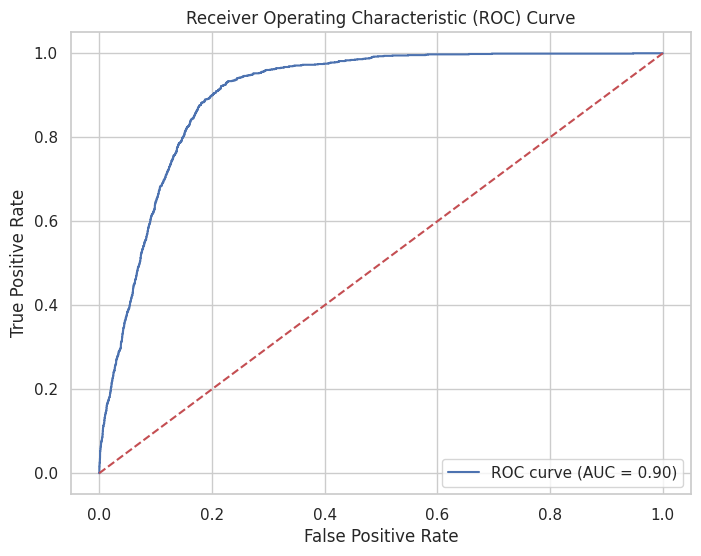

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = final_best_xgb.predict_proba(X_val)[:, 1]  # Get the probability of the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = roc_auc_score(y_val, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()